In [1]:
import albumentations as A
import os
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from skimage.io import imshow

# def des fonctions

In [2]:
def load_image(path):
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [3]:
def view_transform(image,transform):
    fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,8))

    ax[0].imshow(image,cmap='gray')
    #ax[0].set_axis_off()
    #ax[0].set_title("Original Image", size=20)

    #ax[1].set_axis_off()
    ax[1].imshow(transform , cmap='gray')
    #ax[1].set_title("Transformed", size=20)


In [4]:
def add_gaussian_noise(img,sigma):
    # Generate Gaussian noise
    gauss = np.random.normal(0,sigma,img.size)
    gauss = gauss.reshape(img.shape[0],img.shape[1]).astype('uint8')
    # Add the Gaussian noise to the image
    img_gauss = cv2.add(img,gauss)
    return img_gauss

In [5]:
def add_SP_noise(image, prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = image.copy()
    black = 0
    white = 255            
    probs = np.random.random(output.shape[:2])
    output[probs < (prob / 2)] = black
    output[probs > 1 - (prob / 2)] = white
    return output

In [6]:
from math import log10, sqrt  
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    print(f"PSNR value is {psnr} dB")
  

# Augmentation functions

In [7]:
def norm(image):
    norm=A.Normalize(mean=(0, 0, 0), std=(1, 1, 1), max_pixel_value=255.0, p=1.0)
    image=norm(image=image)['image']
    return image

In [8]:
def resize_im(image,w,h):
    resize=A.Resize(width=w,height=h)
    img=resize(image=image)['image']
    return img 

In [9]:
def Hflip_im(image):
    Hflip=A.HorizontalFlip(p=1)
    image=Hflip(image=image)['image']
    return image 

In [10]:
def Vflip_im(image):
    Vflip=A.VerticalFlip(p=1)
    image=Vflip(image=image)['image']
    return image 

In [11]:
def rotate(image,d,f):
    rot=A.Rotate(limit=[d,f], border_mode=cv2.BORDER_CONSTANT, p=1)
    image=rot(image=image)['image']
    return image

In [13]:
''' x_min (int) – minimum upper left x coordinate
    y_min (int) – minimum upper left y coordinate
    x_max (int) – maximum lower right x coordinate
    y_max (int) – maximum lower right y coordinate'''

def crop_im(image,a,b,c,d):  
    crop=A.Crop(x_min=a, y_min=b, x_max=c, y_max=d, p=1.0)
    image=crop(image=image)['image']
    return image

In [14]:
def brightness(image,b):
    bright=A.RandomBrightnessContrast(brightness_limit=(b,b), contrast_limit=0, p=1)
    image=bright(image=image)['image']
    return image

In [15]:
def contrast(image,c):
    cont=A.RandomBrightnessContrast(brightness_limit=0, contrast_limit=(c,c), p=1)
    image=cont(image=image)['image']
    return image

In [16]:
# gamma limit est une valeur random entre a/100 et d/100
def gamma(image,a=60,d=100):
    gam=A.RandomGamma(gamma_limit=(a,d),p=1)
    image=gam(image=image)['image']
    return image 

In [17]:
def saturation(image,sat):
    sat=A.ColorJitter (brightness=0, contrast=0, saturation=(sat,sat), hue=0, p=1)
    #sat=A.HueSaturationValue (hue_shift_limit=0, sat_shift_limit=(sat,sat), val_shift_limit=0, p=1)
    image=sat(image=image)['image']
    return image

In [18]:
def CLAHE(image,clip=0.4):
    clahe=A.CLAHE (clip_limit=clip, tile_grid_size=(8, 8),p=1)
    image=clahe(image=image)['image']
    return image

In [19]:
def gaussianBlur(image,fil_size=(3,7),sigma=0):
    GB= A.GaussianBlur(blur_limit=fil_size, sigma_limit=sigma, p=1)
    image=GB(image=image)['image']
    return image

In [20]:
def MedianBlur(image,limit):
    assert(limit % 2) == 1
    MB= A.MedianBlur(blur_limit=limit,p=1)
    image=MB(image=image)['image']
    return image


# Test sur image "Breast Ultrasound"

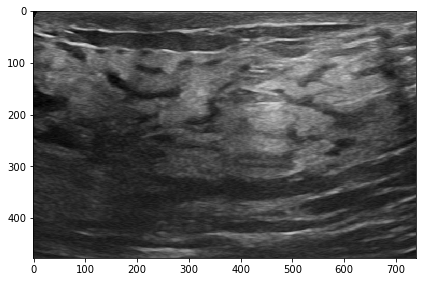

In [21]:
#img_path="Ultrasound.jpeg"
BUS_path="normal (130).jpeg"
Bimage=load_image(BUS_path)
imshow(Bimage)

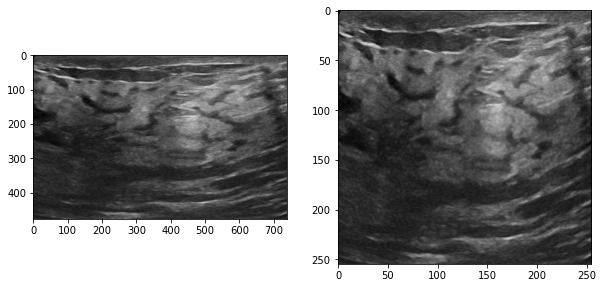

In [22]:
resize_img=resize_im(Bimage,255,255)
view_transform(Bimage, resize_img)

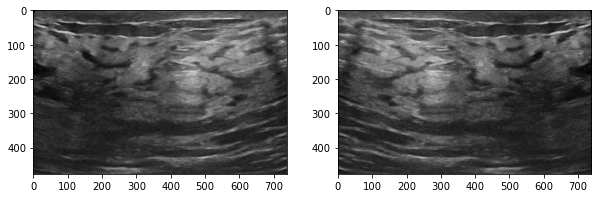

In [23]:
Hflip_img=Hflip_im(Bimage)
view_transform(Bimage, Hflip_img)

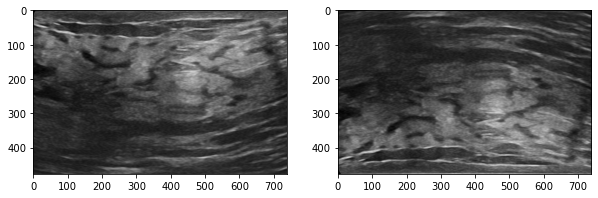

In [24]:
Vflip_img=Vflip_im(Bimage)
view_transform(Bimage,Vflip_img)

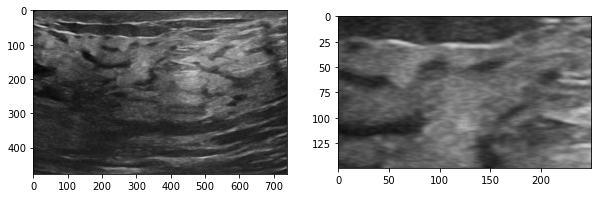

In [25]:
crop_img=crop_im(Bimage,200,50,450,200)
view_transform(Bimage, crop_img)

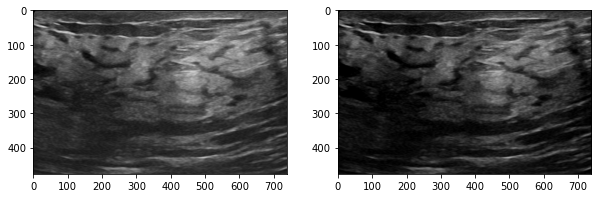

In [26]:
cont_img=brightness(Bimage,-0.1)
view_transform(Bimage,cont_img)

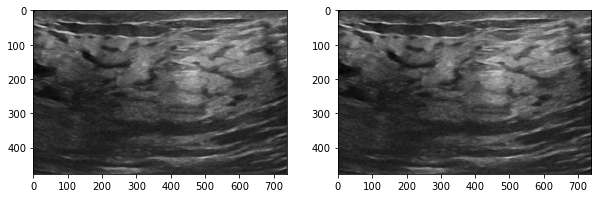

In [27]:
cont_img=saturation(Bimage,0.5)
view_transform(Bimage,cont_img)

PSNR value is 27.415751633526376 dB
None


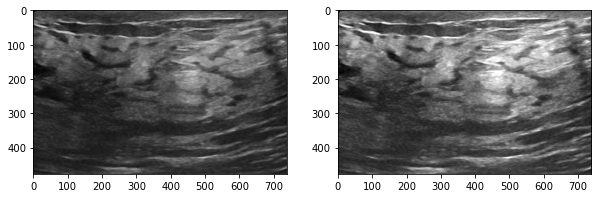

In [28]:
cont_img=contrast(Bimage,0.4)
view_transform(Bimage, cont_img)
print(PSNR(Bimage,cont_img))

PSNR value is 30.151513960377486 dB
None


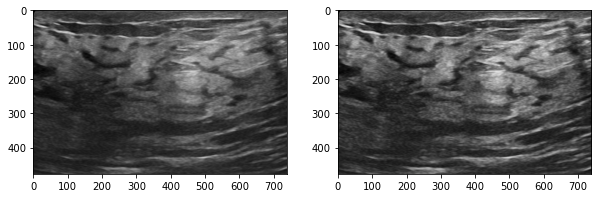

In [29]:
CLAHE_img=CLAHE(Bimage,0.4)
view_transform(Bimage,CLAHE_img)
print(PSNR(Bimage,CLAHE_img))



# Test sur image Mammographie

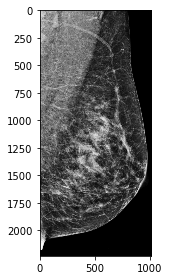

In [30]:
img_path="mammo.jpeg"
mammo=load_image(img_path)
imshow(mammo)

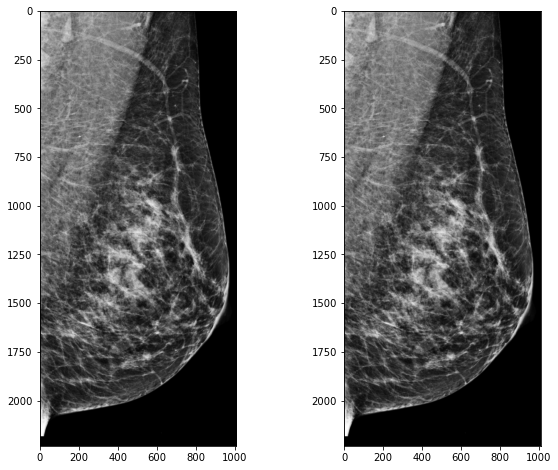

In [31]:
norm_img=norm(mammo)
view_transform(mammo, norm_img)

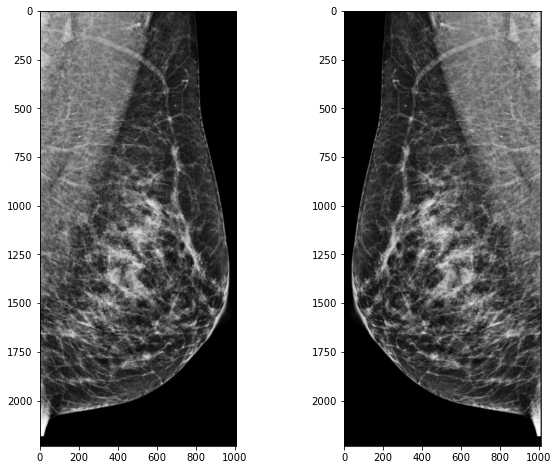

In [32]:
Hflip_img=Hflip_im(mammo)
view_transform(mammo, Hflip_img)

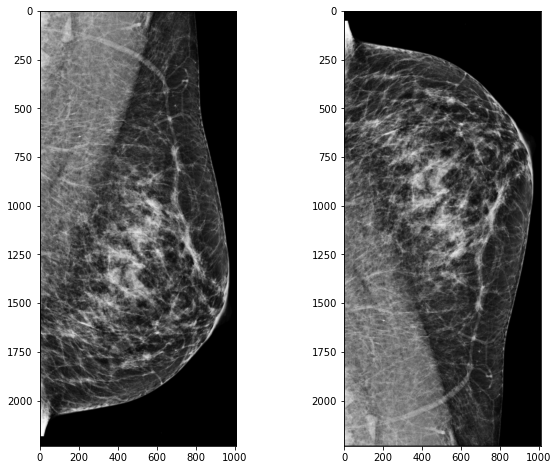

In [33]:
Vflip_img=Vflip_im(mammo)
view_transform(mammo, Vflip_img)

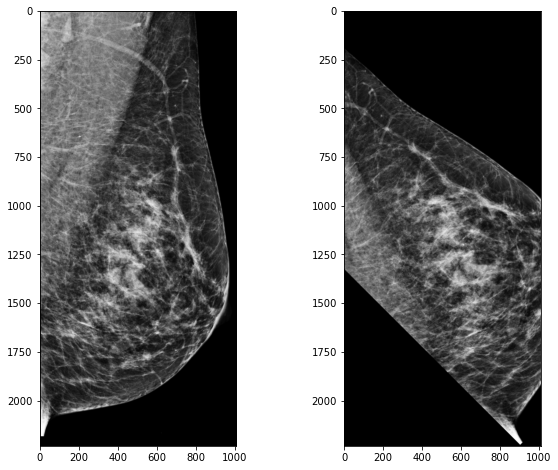

In [34]:
view_transform(mammo,rotate(mammo,45,45))

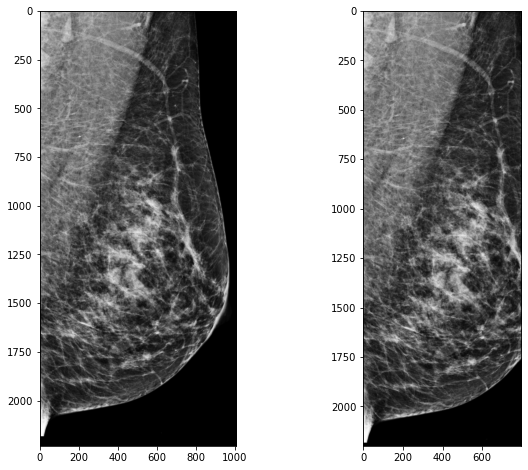

In [35]:
crop_img=crop_im(mammo,0,0,800,2200)
view_transform(mammo, crop_img)

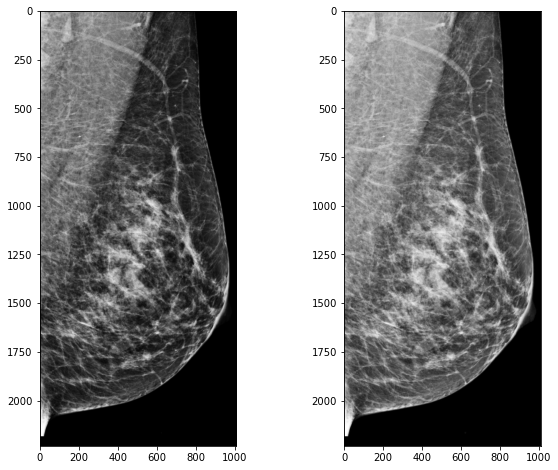

In [36]:
gam_img=gamma(mammo,65,65)
view_transform(mammo, gam_img)

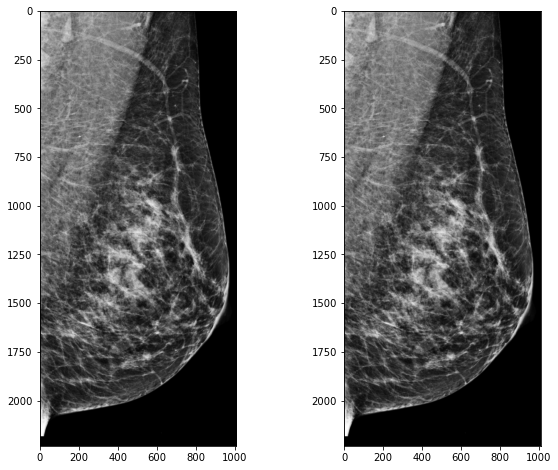

In [37]:
sat=saturation(mammo,1)
view_transform(mammo, sat)

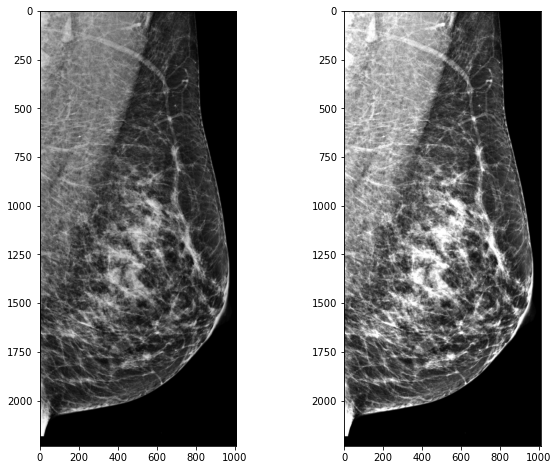

In [38]:
cont_img=contrast(mammo,0.4)
view_transform(mammo, cont_img)

In [39]:
print(PSNR(mammo,cont_img))

PSNR value is 28.68281633998693 dB
None


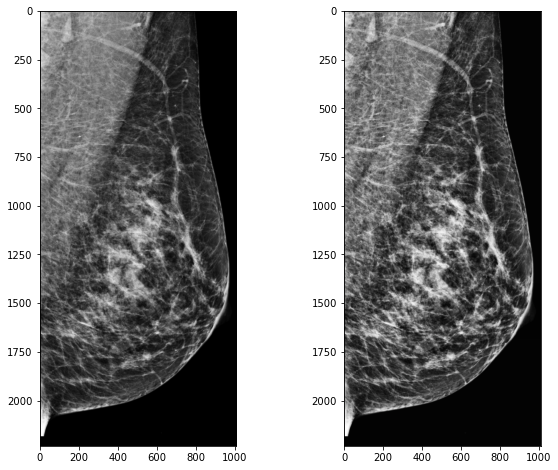

In [40]:
CLAHE_img=CLAHE(mammo,0.4)
view_transform(mammo,CLAHE_img)

In [41]:
print(PSNR(mammo,CLAHE_img))

PSNR value is 30.58285079352394 dB
None


# Filtres sur image "Breast ultrasound" 

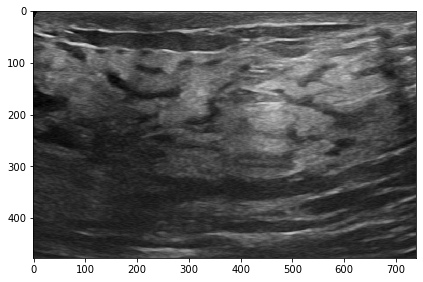

In [42]:
BUS_path="normal (130).jpeg"
Bimage=cv2.imread(BUS_path, cv2.IMREAD_GRAYSCALE)
imshow(Bimage)

PSNR value is 43.943874698269816 dB
None


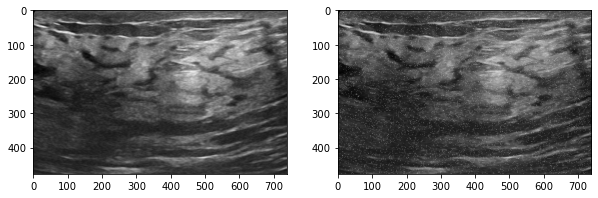

In [43]:
img_noise=add_gaussian_noise(Bimage,0.5)
view_transform(Bimage,img_noise)
print(PSNR(Bimage,img_noise))

PSNR value is 33.818458422591874 dB
None


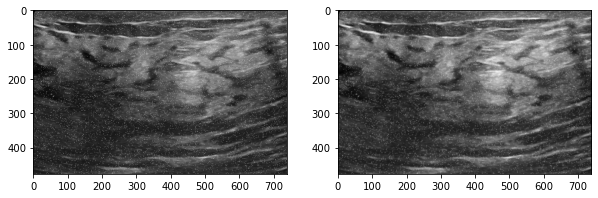

In [44]:
denoised_img=gaussianBlur(img_noise,(3,3))
view_transform(img_noise,denoised_img)
print(PSNR(Bimage,denoised_img))

PSNR value is 32.89621347392491 dB
None


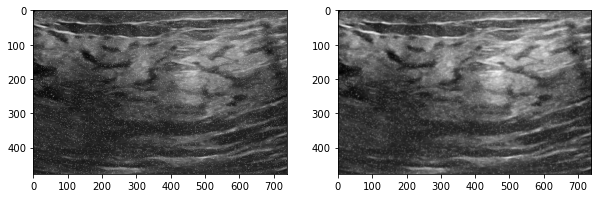

In [45]:
denoised_img=gaussianBlur(img_noise,(5,5))
view_transform(img_noise,denoised_img)
print(PSNR(Bimage,denoised_img))

PSNR value is 31.838890479867242 dB
None


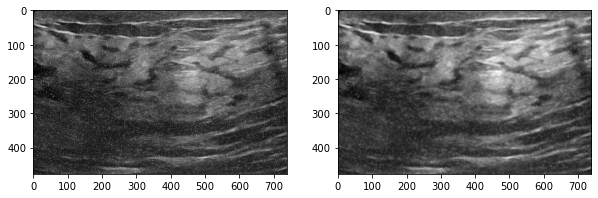

In [46]:
denoised_img=gaussianBlur(img_noise,(7,7))
view_transform(img_noise,denoised_img)
print(PSNR(Bimage,denoised_img))

# Filtre median pour un bruit gaussien

PSNR value is 41.39235776662084 dB
None


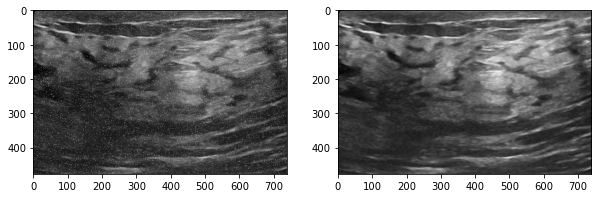

In [47]:
denoised_img=MedianBlur(img_noise,3)
view_transform(img_noise,denoised_img)
print(PSNR(Bimage,denoised_img))

PSNR value is 41.39235776662084 dB
None


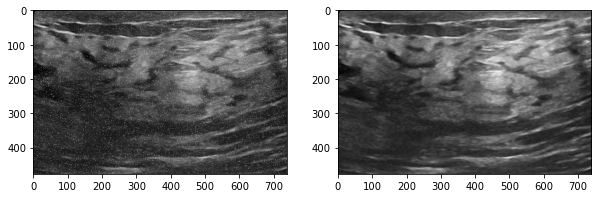

In [48]:
denoised_img=MedianBlur(img_noise,5)
view_transform(img_noise,denoised_img)
print(PSNR(Bimage,denoised_img))

PSNR value is 41.39235776662084 dB
None


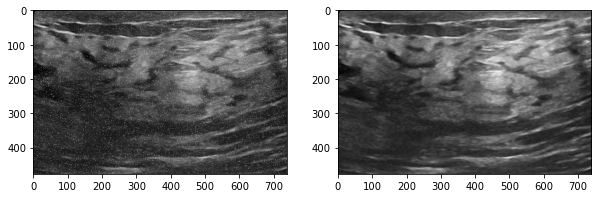

In [49]:
denoised_img=MedianBlur(img_noise,7)
view_transform(img_noise,denoised_img)
print(PSNR(Bimage,denoised_img))

# Filtre median  pour un bruit "salt and pepper"  

PSNR value is 34.54441255619006 dB
None


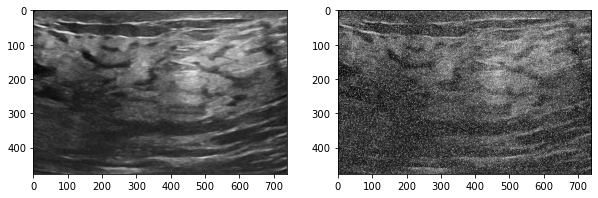

In [50]:
img_noise=add_SP_noise(Bimage,0.2)
view_transform(Bimage,img_noise)
print(PSNR(Bimage,img_noise))

PSNR value is 38.03907021017388 dB
None


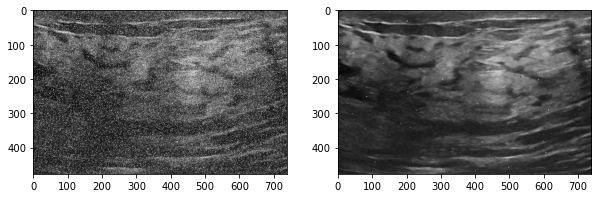

In [51]:
denoised_img=MedianBlur(img_noise,3)
view_transform(img_noise,denoised_img)
print(PSNR(Bimage,denoised_img))

PSNR value is 35.40208372695688 dB
None


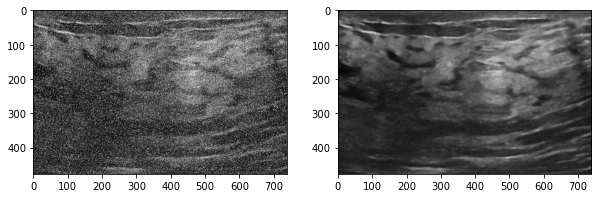

In [52]:
denoised_img=MedianBlur(img_noise,5)
view_transform(img_noise,denoised_img)
print(PSNR(Bimage,denoised_img))

PSNR value is 33.75689943077592 dB
None


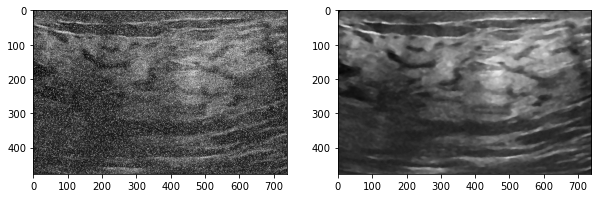

In [53]:
denoised_img=MedianBlur(img_noise,7)
view_transform(img_noise,denoised_img)
print(PSNR(Bimage,denoised_img))

# Filtres sur Mammographie

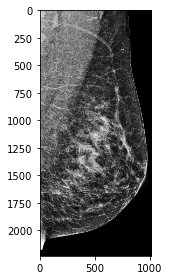

In [54]:
img_path="mammo.jpeg"
mammo=cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
imshow(mammo)

PSNR value is 36.82746663692765 dB
None


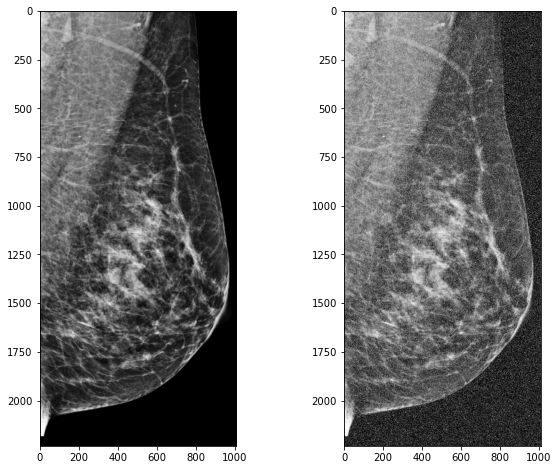

In [55]:
img_noise=add_gaussian_noise(mammo,1)
view_transform(mammo,img_noise)
print(PSNR(mammo,img_noise))

PSNR value is 29.487987805030656 dB
None


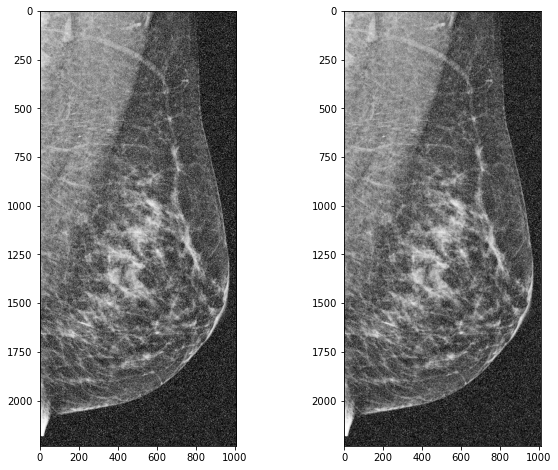

In [56]:
denoised_img=gaussianBlur(img_noise,(3,3))
view_transform(img_noise,denoised_img)
print(PSNR(mammo,denoised_img))

PSNR value is 28.02418954450988 dB
None


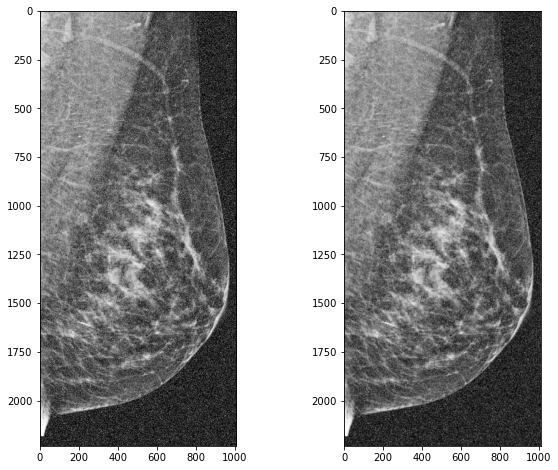

In [57]:
denoised_img=gaussianBlur(img_noise,(5,5))
view_transform(img_noise,denoised_img)
print(PSNR(mammo,denoised_img))

PSNR value is 27.68779312858786 dB
None


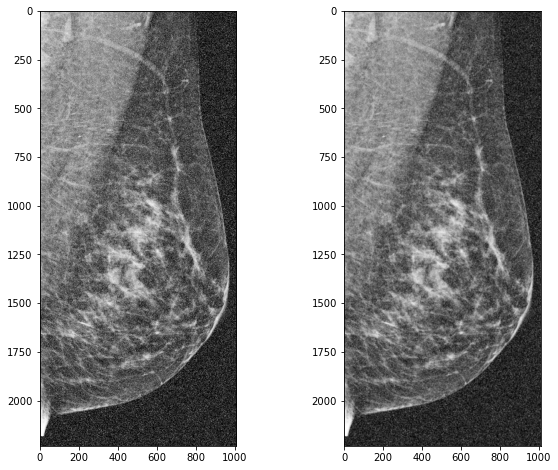

In [58]:
denoised_img=gaussianBlur(img_noise,(7,7))
view_transform(img_noise,denoised_img)
print(PSNR(mammo,denoised_img))

# Filtre median pour un bruit gaussien

PSNR value is 35.03944948290275 dB
None


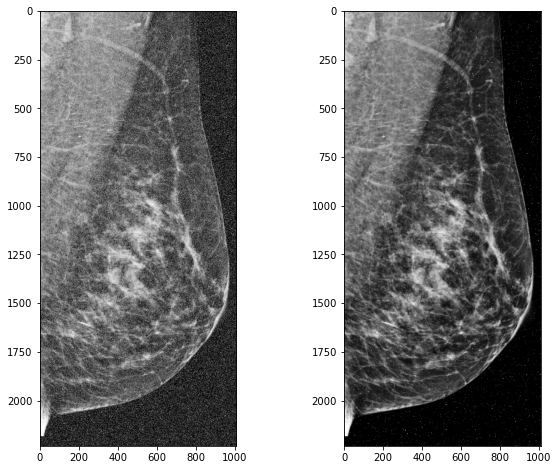

In [59]:
denoised_img=MedianBlur(img_noise,3)
view_transform(img_noise,denoised_img)
print(PSNR(mammo,denoised_img))

PSNR value is 35.03944948290275 dB
None


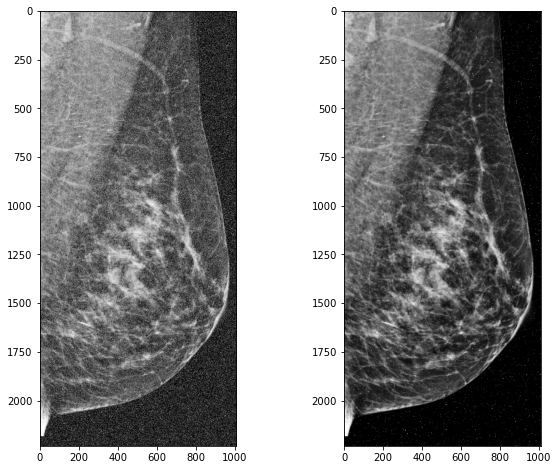

In [60]:
denoised_img=MedianBlur(img_noise,5)
view_transform(img_noise,denoised_img)
print(PSNR(mammo,denoised_img))

PSNR value is 35.03944948290275 dB
None


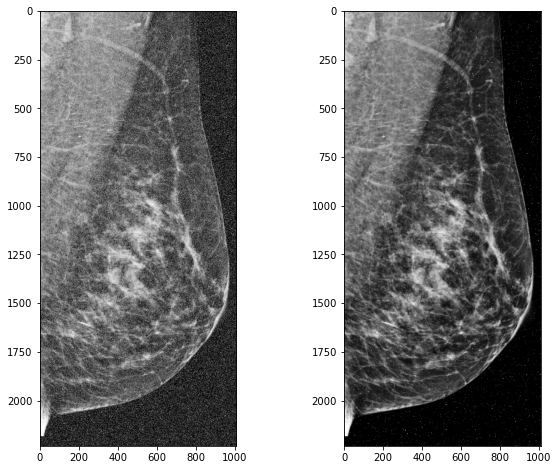

In [61]:
denoised_img=MedianBlur(img_noise,7)
view_transform(img_noise,denoised_img)
print(PSNR(mammo,denoised_img))

# Filtre median  pour un bruit "salt and pepper" 

PSNR value is 35.91696165144 dB
None


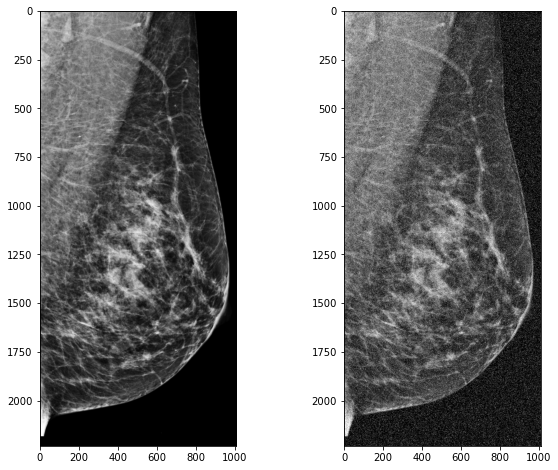

In [62]:
img_noise=add_SP_noise(mammo,0.2)
view_transform(mammo,img_noise)
print(PSNR(mammo,img_noise))

PSNR value is 35.56627943230783 dB
None


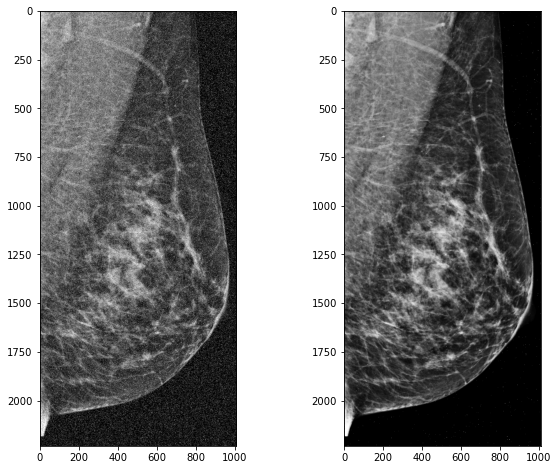

In [63]:
denoised_img=MedianBlur(img_noise,3)
view_transform(img_noise,denoised_img)
print(PSNR(mammo,denoised_img))

PSNR value is 35.56627943230783 dB
None


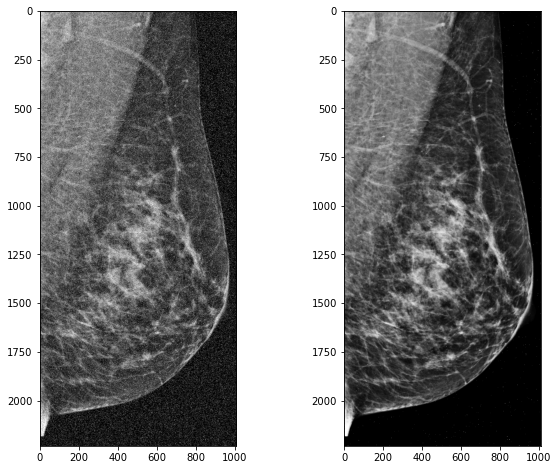

In [64]:
denoised_img=MedianBlur(img_noise,5)
view_transform(img_noise,denoised_img)
print(PSNR(mammo,denoised_img))

PSNR value is 35.56627943230783 dB
None


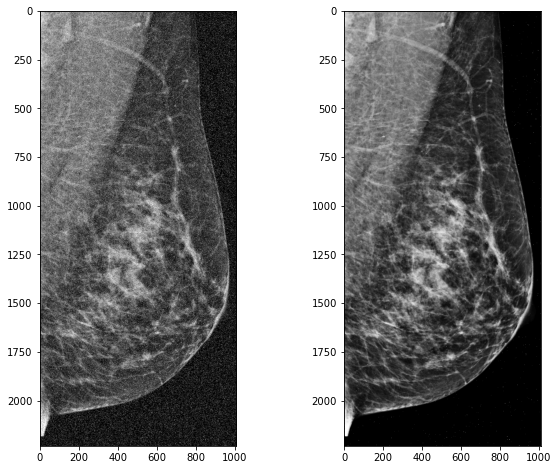

In [65]:
denoised_img=MedianBlur(img_noise,7)
view_transform(img_noise,denoised_img)
print(PSNR(mammo,denoised_img))